<a href="https://colab.research.google.com/github/SarahKhader/DBSCAN/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class DBSCAN:
    #  Constructor method to initialize DBSCAN parameters -- Rahma this should be input from Firfly
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    #  Method to perform DBSCAN clustering
    def fit(self, X):
        self.labels = [0] * len(X)
        self.cluster_id = 0
        self.visited = set()

        #  Iterate through each data point -- This can be enhanced we have to think about other ways
        for i in range(len(X)):
            if i in self.visited:
                continue
            self.visited.add(i)
            neighbors = self.region_query(X, i)

            #  Check if the point is a core point, a border point, or noise -- we have to think about the noise too, I think we can implement the algorithm with permitted noise rate
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  #  Noise point
            else:
                self.expand_cluster(X, i, neighbors)
                self.cluster_id += 1

        return self.labels

    #  Method to find neighbors within the epsilon radius (eps)
    def region_query(self, X, idx):
        neighbors = []
        for i, point in enumerate(X):
            if self.distance(X[idx], point) < self.eps:
                neighbors.append(i)
        return neighbors

    #  Method to expand a cluster by recursively finding connected points -- This implementation was cloned from someone on internet recheck Sara
    def expand_cluster(self, X, idx, neighbors):
        self.labels[idx] = self.cluster_id
        for neighbor_idx in neighbors:
            if neighbor_idx not in self.visited:
                self.visited.add(neighbor_idx)
                neighbor_neighbors = self.region_query(X, neighbor_idx)
                if len(neighbor_neighbors) >= self.min_samples:
                    neighbors.extend(neighbor_neighbors)
            if self.labels[neighbor_idx] == 0:
                self.labels[neighbor_idx] = self.cluster_id

    #  Method to calculate Euclidean distance between two points -- we can think of new measures but this works really well
    def distance(self, a, b):
        return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5


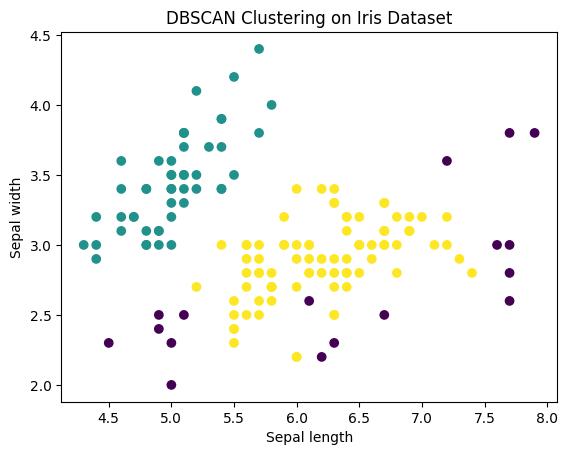

In [ ]:
# Example usage - imports
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load Iris dataset - I know Dr.Naela said it is a classification dataset but all recommendation online said to use it for clustering as a base dataset
iris = load_iris()
X = iris.data  # Feature matrix

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5) # This is the best eps I found
labels = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()
